# GAM [Generalized Additive Model]

<p> GAM is a regression model that allows for non-linear relationships between the predictors and the response variable but it ignores the interaction between predictors. Natural splines are used in this model to capture the non-linear relationships (James et al., 2021). </p>

In [1]:
library(gam)
library(splines)

Warning message:
"package 'gam' was built under R version 3.6.3"Loading required package: splines
Loading required package: foreach
Loaded gam 1.16.1



#### Let's load the dataset

In [2]:
data <- read.csv('C:/Users/saisr/Documents/Wayne/Winter 2022/STA 5820/Bike-Sharing-Dataset/hour.csv')

# Making a copy so the original can be referred back if needed 
df <- data

str(df)

'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Factor w/ 731 levels "2011-01-01","2011-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt       : int  16 40 32 13 1 1 2 3 8 14 ...


In [3]:
df$instant <- NULL
df$registered <- NULL
df$casual <- NULL

df$season <- as.factor(df$season)
df$yr <- as.factor(df$yr)
df$mnth <- as.factor(df$mnth)
df$hr <- as.factor(df$hr)
df$holiday <- as.factor(df$holiday)
df$workingday <- as.factor(df$workingday)
df$weathersit <- as.factor(df$weathersit)
df$weekday <- as.factor(df$weekday)


df$atemp <- NULL # atemp is the normalized feeling temperature in Celsius while temp is 
# Normalized temperature in Celsius. So these variables are similar in meaning and are redundant. So, it is reasonable
# to remove the atemp variable.

#### Splitting the dataset

In [4]:
# Since this is a time-series data and we need to compare models,  the dataset will not be randomly split into train 
# and test datasets. Instead, the first 13904 observations [80% of the dataset] will be in training set, and the 
# remaining 3475 observations will be in test set.

t <- c(1:13904)
Train <- df[t,]
Test <- df[-t,]

train.X <- data.frame(Train[,1:11])
train.y <- c(Train[, 12])
test.x <- data.frame(Test[, 1:11])
test.y <- c(Test[,12])

In [5]:
Train$dteday <- NULL # Since we are interested in how the condition of the day affects the amount of rental bikes,
# we can remove dteday that states the date on which the data was collected.
Test$dteday <- NULL 
head(Train)

season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
1,0,1,5,0,6,0,2,0.24,0.75,0.0896,1


#### Training the model

In [6]:
GAM_1 <- gam(cnt ~ season +  yr+  mnth+  hr+  holiday+  weekday+  workingday+  weathersit+  
               ns(temp, 2) +  ns(hum,2)+  ns(windspeed,2), data=Train)

Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

In [7]:
summary(GAM_1)


Call: gam(formula = cnt ~ season + yr + mnth + hr + holiday + weekday + 
    workingday + weathersit + ns(temp, 2) + ns(hum, 2) + ns(windspeed, 
    2), data = Train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-342.059  -54.075   -5.923   46.445  448.639 

(Dispersion Parameter for gaussian family taken to be 8662.675)

    Null Deviance: 387517620 on 13903 degrees of freedom
Residual Deviance: 119969380 on 13849 degrees of freedom
AIC: 165579.2 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                    Df    Sum Sq  Mean Sq   F value    Pr(>F)    
season               3  27017392  9005797 1039.6093 < 2.2e-16 ***
yr                   1  24022920 24022920 2773.1527 < 2.2e-16 ***
mnth                11   5462561   496596   57.3260 < 2.2e-16 ***
hr                  23 196607375  8548147  986.7792 < 2.2e-16 ***
holiday              1     33199    33199    3.8325   0.05029 .  
weekday              6    242337    40389    4.6625 9.600e-

#### Most of the variables are statistically significant at α = 0.001 except for holiday, which is significant at α = 0.1. This means that all the predictors are related to the response variable by more than just chance.

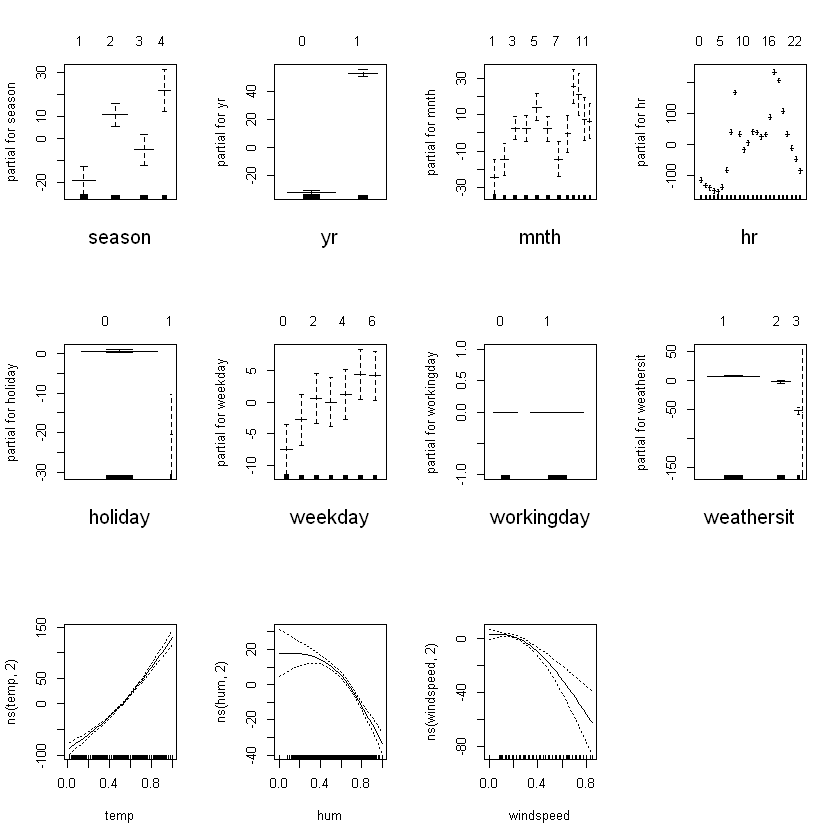

In [8]:
par(mfrow = c(3,4))
plot(GAM_1,se=TRUE)

#### These graphs show how the variable on the x-axis affects our variable of interest when other variables are considered to be fixed. The relationships shown in the graph are similar to our findings found in the EDA. For example, the temp [temperature], hum [humidity], and mnth [month] variables match conclusions in the EDA.

### Using the model on the test dataset

In [9]:
pred.tst <- predict(GAM_1, newdata = Test)


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [10]:
(mean((test.y-pred.tst)^2)^0.5)

[1] 276.8175

#### The test RMSE is ~ 276.82 